## Import Library

In [1]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import json
import re
import networkx as nx

from scipy import stats

warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
# pd.set_option("max_colwidth", None)



## Read Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
with open('/content/drive/MyDrive/Colab Notebooks/sample-data.json', 'r') as f:
    jsondata = json.load(f)

In [5]:
jsondata[0]

{'taskLocationDone': {'lon': 109.7629103, 'lat': -6.9266078},
 'taskCreatedTime': '2022-11-01 20:17:26 +0700',
 'cod': {'amount': 685000, 'received': True},
 'taskAssignedTo': 'pacifiedLion0',
 'taskCompletedTime': '2022-11-01 20:46:30 +0700',
 'taskStatus': 'done',
 'flow': 'Delivery',
 'taskId': '4fe3b237c832ca4841a2',
 'UserVar': {'branch_dest': 'SRG',
  'taskStatusLabel': 'Success',
  'receiver_city': 'BATANG ,KAB BATANG',
  'taskDetailStatusLabel': 'YANG BERSANGKUTAN',
  'taskDetailStatus': 'D01',
  'weight': '13',
  'branch_origin': 'CGK',
  'taskStatus': 'COLF01'}}

In [6]:
data = pd.json_normalize(jsondata)

In [7]:
data.head(10)

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,taskLocationDone.lon,taskLocationDone.lat,cod.amount,cod.received,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus
0,2022-11-01 20:17:26 +0700,pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,685000.0,True,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13,CGK,COLF01
1,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,110.033986,-7.876154,53500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.3,CGK,COLF01
2,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,179500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01
3,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,110.003708,-7.710998,31815.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,COLF01
4,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,110.013887,-7.829742,144562.0,True,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01
5,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 19:34:44 +0700,done,Delivery,67ec7d34b4f3adbf2895,110.023131,-7.706646,206610.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,2.5,CGK,COLF01
6,2022-11-01 12:00:28 +0700,pacifiedLion0,2022-11-01 20:46:03 +0700,done,Delivery,2079aa99bda230940785,109.762910,-6.926608,38200.0,True,SRG,Success,"KANDEMAN,BATANG",YANG BERSANGKUTAN,D01,0.7,CGK,COLF01
7,2022-11-01 14:23:20 +0700,pacifiedLion0,2022-11-01 15:45:13 +0700,done,Delivery,b3975d6adb8e802c749b,109.729141,-6.911588,33000.0,True,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,0.04,CGK,COLF01
8,2022-11-01 09:13:16 +0700,giddyCockatoo1,2022-11-01 15:39:01 +0700,done,Delivery,ea26e88eaf27edd7885b,109.780323,-7.663731,65867.0,True,MGL,Success,"BUTUH,PURWOREJO",YANG BERSANGKUTAN,D01,0.8,CGK,COLF01
9,2022-11-01 09:13:16 +0700,giddyCockatoo1,2022-11-01 15:36:44 +0700,done,Delivery,f53a4daf67534816dbd9,109.780821,-7.663288,26800.0,True,MGL,Success,"BUTUH,PURWOREJO",YANG BERSANGKUTAN,D01,0.1,CGK,COLF01


In [8]:
data.columns

Index(['taskCreatedTime', 'taskAssignedTo', 'taskCompletedTime', 'taskStatus',
       'flow', 'taskId', 'taskLocationDone.lon', 'taskLocationDone.lat',
       'cod.amount', 'cod.received', 'UserVar.branch_dest',
       'UserVar.taskStatusLabel', 'UserVar.receiver_city',
       'UserVar.taskDetailStatusLabel', 'UserVar.taskDetailStatus',
       'UserVar.weight', 'UserVar.branch_origin', 'UserVar.taskStatus'],
      dtype='object')

In [9]:
for i in list(data.columns):
    if len(data[i].value_counts()) < 50:
        print("Kolom: ", i)
        print(data[i].value_counts())
        print('--')

Kolom:  taskStatus
done       7572
ongoing     762
Name: taskStatus, dtype: int64
--
Kolom:  flow
Delivery    8334
Name: flow, dtype: int64
--
Kolom:  cod.received
False    1663
True      695
Name: cod.received, dtype: int64
--
Kolom:  UserVar.taskStatusLabel
Success    5427
Failed     2145
Name: UserVar.taskStatusLabel, dtype: int64
--
Kolom:  UserVar.taskDetailStatusLabel
YANG BERSANGKUTAN                                    3109
KELUARGA/SAUDARA                                      774
MISROUTE                                              763
ATASAN/STAFF/KARYAWAN/BAWAHAN                         634
SECURITY                                              564
ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL           322
RUMAH service/ KANTOR KOSONG (MASIH DIHUNI)           304
NEW ADDRESS                                           247
DIAMBIL SENDIRI                                       100
SUAMI/ISTRI/ANAK                                       94
RECEPTIONIST                               

specify the columns. it will drop some columns such id or columns those have same value for all data. <br> <br>

We will drop flow columns because it have the same value for all data ('delivery').<br>
We also will drop both UserVar.taskDetailStatus and UserVar.taskStatus because there is no details description for each status.<br><br>

Also taskId as the ID column (unique).

In [10]:
filtered_data = data[['taskCreatedTime', 'taskAssignedTo', 'taskCompletedTime', 'taskStatus',
       'taskLocationDone.lon', 'taskLocationDone.lat',
       'cod.amount', 'cod.received', 'UserVar.branch_dest',
       'UserVar.taskStatusLabel', 'UserVar.receiver_city',
       'UserVar.taskDetailStatusLabel',
       'UserVar.weight', 'UserVar.branch_origin']]

In [11]:
filtered_data.head(10)

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,taskLocationDone.lon,taskLocationDone.lat,cod.amount,cod.received,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.weight,UserVar.branch_origin
0,2022-11-01 20:17:26 +0700,pacifiedLion0,2022-11-01 20:46:30 +0700,done,109.762910,-6.926608,685000.0,True,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,13,CGK
1,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 12:33:48 +0700,done,110.033986,-7.876154,53500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,1.3,CGK
2,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 13:41:57 +0700,done,109.999733,-7.849777,179500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,3,CGK
3,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 18:18:19 +0700,done,110.003708,-7.710998,31815.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,0.625,CGK
4,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 10:51:49 +0700,done,110.013887,-7.829742,144562.0,True,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,3,CGK
5,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 19:34:44 +0700,done,110.023131,-7.706646,206610.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,2.5,CGK
6,2022-11-01 12:00:28 +0700,pacifiedLion0,2022-11-01 20:46:03 +0700,done,109.762910,-6.926608,38200.0,True,SRG,Success,"KANDEMAN,BATANG",YANG BERSANGKUTAN,0.7,CGK
7,2022-11-01 14:23:20 +0700,pacifiedLion0,2022-11-01 15:45:13 +0700,done,109.729141,-6.911588,33000.0,True,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,0.04,CGK
8,2022-11-01 09:13:16 +0700,giddyCockatoo1,2022-11-01 15:39:01 +0700,done,109.780323,-7.663731,65867.0,True,MGL,Success,"BUTUH,PURWOREJO",YANG BERSANGKUTAN,0.8,CGK
9,2022-11-01 09:13:16 +0700,giddyCockatoo1,2022-11-01 15:36:44 +0700,done,109.780821,-7.663288,26800.0,True,MGL,Success,"BUTUH,PURWOREJO",YANG BERSANGKUTAN,0.1,CGK


In [12]:
filtered_data.dropna(inplace=True)

## The insight we can get: <br>

### 1. Delivery Time Analysis <br>

We can calculate the duration of each delivery task by subtracting the taskCreatedTime from the taskCompletedTime. This information can be used to analyze the average delivery time, identify outliers, and detect any patterns or trends in delivery durations.

In [13]:
# Convert 'taskCreatedTime' and 'taskCompletedTime' columns to datetime with UTC timezone
filtered_data['taskCreatedTime'] = pd.to_datetime(filtered_data['taskCreatedTime'], utc=True)
filtered_data['taskCompletedTime'] = pd.to_datetime(filtered_data['taskCompletedTime'], utc=True)

# Calculate the duration of each delivery task
filtered_data['taskDuration'] = filtered_data['taskCompletedTime'] - filtered_data['taskCreatedTime']

# Print the DataFrame with the added 'taskDuration' column
print(filtered_data[['taskCreatedTime', 'taskCompletedTime', 'taskDuration']].head(10))

            taskCreatedTime         taskCompletedTime    taskDuration
0 2022-11-01 13:17:26+00:00 2022-11-01 13:46:30+00:00 0 days 00:29:04
1 2022-11-01 01:41:07+00:00 2022-11-01 05:33:48+00:00 0 days 03:52:41
2 2022-11-01 01:41:07+00:00 2022-11-01 06:41:57+00:00 0 days 05:00:50
3 2022-11-01 01:41:07+00:00 2022-11-01 11:18:19+00:00 0 days 09:37:12
4 2022-11-01 01:41:07+00:00 2022-11-01 03:51:49+00:00 0 days 02:10:42
5 2022-11-01 01:41:07+00:00 2022-11-01 12:34:44+00:00 0 days 10:53:37
6 2022-11-01 05:00:28+00:00 2022-11-01 13:46:03+00:00 0 days 08:45:35
7 2022-11-01 07:23:20+00:00 2022-11-01 08:45:13+00:00 0 days 01:21:53
8 2022-11-01 02:13:16+00:00 2022-11-01 08:39:01+00:00 0 days 06:25:45
9 2022-11-01 02:13:16+00:00 2022-11-01 08:36:44+00:00 0 days 06:23:28


### 2. Branch Analysis:
Investigate the UserVar.branch_dest and UserVar.branch_origin columns to understand the distribution of delivery branches. Visualize the delivery volume per branch, analyze the performance of different branches, and identify any potential areas for improvement or optimization.


Most Popular Origin-Destination Pairs:
    UserVar.branch_origin UserVar.branch_dest  Count
111                   CGK                 SRG    220
94                    CGK                 MGL    140
66                    CGK                 BDO    137
77                    CGK                 CLG     88
89                    CGK                 KOE     84
102                   CGK                 PLM     74
74                    CGK                 CBN     59
99                    CGK                 PGK     58
87                    CGK                 KDI     48
95                    CGK                 MJK     46

Most Connected Branches:
['CGK', 'JOG', 'BDO', 'DPK', 'BOO', 'CBN', 'SOC', 'SRG', 'SMI', 'KOE']



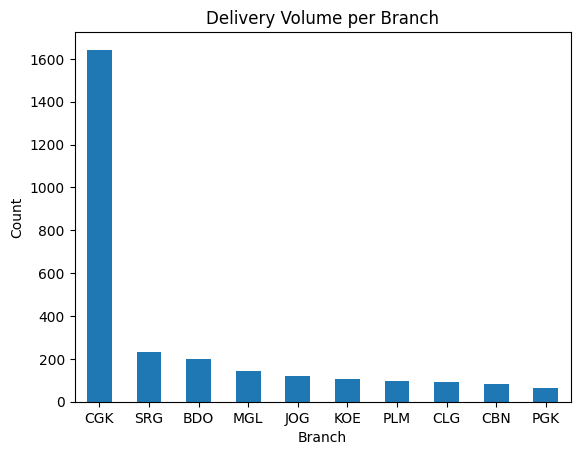

In [22]:
# Analyze the most popular origin-destination pairs
origin_dest_counts = filtered_data.groupby(['UserVar.branch_origin', 'UserVar.branch_dest']).size().reset_index(name='Count')
most_popular_pairs = origin_dest_counts.sort_values('Count', ascending=False).head(10)
print('Most Popular Origin-Destination Pairs:')
print(most_popular_pairs)
print()

# Analyze the most connected branches
G = nx.from_pandas_edgelist(filtered_data, 'UserVar.branch_origin', 'UserVar.branch_dest')
degree_centrality = nx.degree_centrality(G)
most_connected_branches = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:10]
print('Most Connected Branches:')
print(most_connected_branches)
print()

# Plot the count of deliveries per branch
branch_counts = pd.concat([filtered_data['UserVar.branch_origin'], filtered_data['UserVar.branch_dest']])
branch_counts = branch_counts.value_counts().sort_values(ascending=False)[:10]
branch_counts.plot(kind='bar', xlabel='Branch', ylabel='Count', rot=0)
plt.title('Delivery Volume per Branch')
plt.show()

### 3. Receiver City Analysis:
Analyze the UserVar.receiver_city column to understand the distribution of delivery destinations. Visualize the delivery volume per city, identify popular delivery destinations, and analyze city with highest percentage using COD.

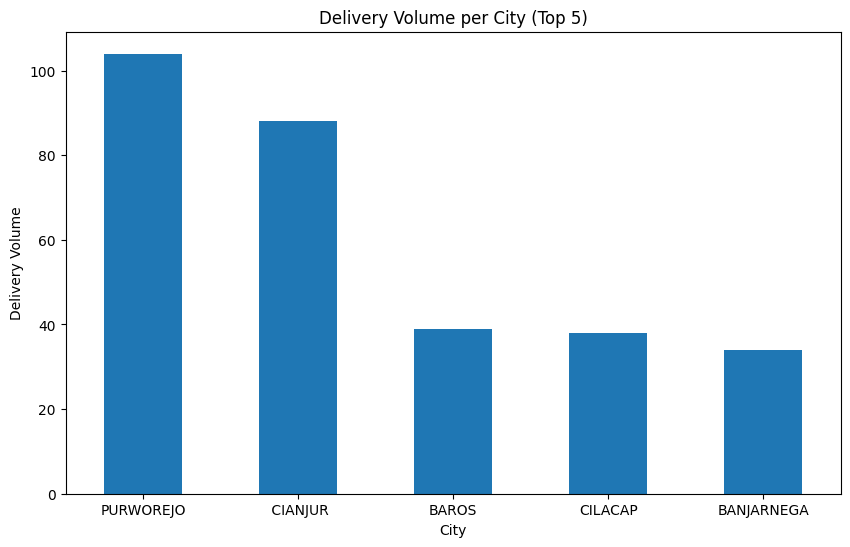

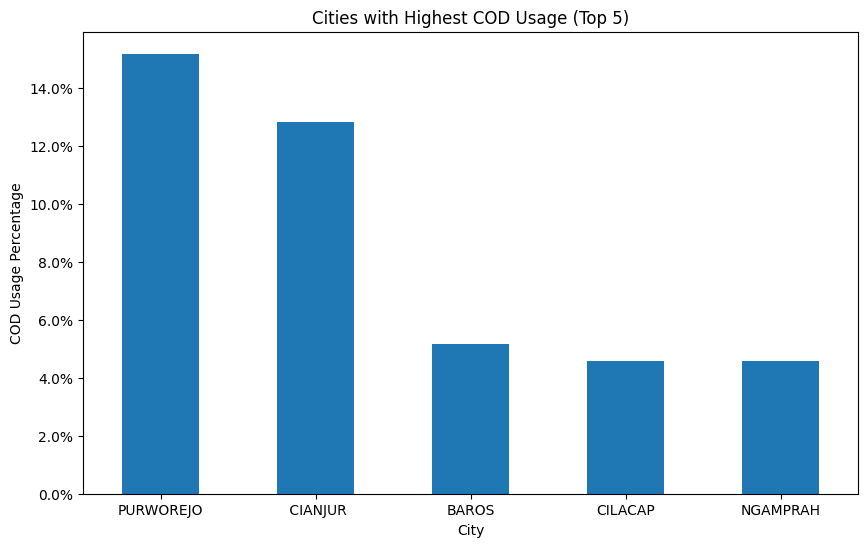

In [32]:
# Extract the city from UserVar.receiver_city column
filtered_data['city'] = filtered_data['UserVar.receiver_city'].str.split(',', expand=True)[1]

# Visualize the delivery volume per city (top 5)
top_10_cities = filtered_data['city'].value_counts().head(5)
plt.figure(figsize=(10, 6))
top_10_cities.plot(kind='bar', xlabel='City', ylabel='Delivery Volume', rot=0)
plt.title('Delivery Volume per City (Top 5)')
plt.show()

# Convert 'cod.received' column to boolean type
filtered_data['cod.received'] = filtered_data['cod.received'].astype(bool)

# Calculate the percentage of COD usage per city
city_cod_counts = filtered_data.groupby('city')['cod.received'].sum()
city_cod_percentages = (city_cod_counts / city_cod_counts.sum()) * 100
top_10_cod_cities = city_cod_percentages.nlargest(5)

plt.figure(figsize=(10, 6))
ax = top_10_cod_cities.plot(kind='bar', xlabel='City', ylabel='COD Usage Percentage', rot=0)
plt.title('Cities with Highest COD Usage (Top 5)')

# Add '%' sign to y-axis ticks
ax.set_yticklabels([f'{x}%' for x in ax.get_yticks()])

plt.show()

## Because of the lack of time to give a breakdown for every insights, I will provide the general ideas on how to get other insights.





### 1.   Predictive Analysis:
With historical data on taskCreatedTime, taskAssignedTo, and other relevant features, you can build a machine learning model to predict the expected task completion time. This can help optimize resource allocation and improve customer satisfaction by providing accurate delivery time estimates.

### 2. Geospatial Analysis:
Utilize the taskLocationDone.lon and taskLocationDone.lat columns to visualize the delivery locations on a map. This can help identify areas with high delivery density, potential delivery routes optimization, and analyze the distribution of deliveries across different regions.

### 3. Task Status Analysis:
Analyze the distribution of taskStatus and UserVar.taskStatus to gain insights into the overall completion rate, identify any patterns in task statuses, and evaluate the effectiveness of different task status labels.


### 4. Weight Analysis:
Explore the UserVar.weight column to analyze the weight distribution of delivered items. This information can be used to optimize logistics and resource allocation, evaluate the impact of weight on delivery time, and identify any weight-related patterns or trends.

